In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
info = pd.read_csv("UpdatedNew_v1.csv")
review = pd.read_csv("newreview.csv")

### `country` and `type` are redundant columns, so delete them:

In [2]:
info.drop(['Unnamed: 0', 'country', 'type'], axis=1, inplace=True)

### transform `duartion` to counted in minutes

In [3]:
info['duration'] = info.duration / 60

In [4]:
info.head()

,kdrama_id,drama_name,year,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],['Lee Do Ah'],8,25.0,08-02-2023,08-02-2023,Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,['Han Jun hee'],['Kim Bo Tong'],6,50.0,07-28-2023,07-28-2023,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,55.0,07-05-2023,07-26-2023,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,45.0,06-30-2023,06-30-2023,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
4,e632ba76285f438d9448852dd31bcd96,Numbers,2023,['Kim Chil Bong'],"['Oh Hye Seok', 'Jung An']",12,60.0,06-23-2023,07-29-2023,"Friday, Saturday",MBC,15+ - Teens 15 or older,Ho Woo is the first and only high school gradu...,2685,1546


### Rank of directors and screenwriters wrt rank & popularity

In [17]:
import re
director_rank = pd.DataFrame({'director': info['director'].apply(lambda x: np.NaN if pd.isnull(x) else re.split(r"', '", x.strip('[\']'))),
                             'screenwriter': info['screenwriter'].apply(lambda x: np.NaN if pd.isnull(x) else re.split(r"', '", x.strip('[\']'))),
                             'rank': info['rank'],
                             'pop': info['pop']
                             })
director_rank

,director,screenwriter,rank,pop
0,[So Joon Moon],[Lee Do Ah],1484,2238
1,[Han Jun hee],[Kim Bo Tong],164,1084
2,[Han Dong Hwa],"[Song Jung Woo, Hwang Seol Hun]",2443,6915
3,[Kim Chul Gyu],[Kim Yi Young],826,547
4,[Kim Chil Bong],"[Oh Hye Seok, Jung An]",2685,1546
...,...,...,...,...
1068,[Lee Yoon Jung],[Lee Jung Ah],2650,943
1069,"[Kim Jin Man, Kim Dae Jin]",[Jin Soo Wan],232,29
1070,[Park Kyung Ryul],[Park Hye Ryun],47882,10759
1071,"[Jang Joon Ho, Oh Hyun Chang]",[Seol Kyung Eun],58155,14841


In [28]:
# top and bottom directors in ranking
rank1 = []
for i, row in director_rank[['director', 'rank']].dropna().iterrows():
    for director in row.director:
        rank1.append([director, row['rank']])
rank1 = pd.DataFrame(rank1, columns=['director', 'rank']).groupby(['director']).mean().sort_values(by=['rank'])

# top and bottom directors in popularity
rank2 = []
for i, row in director_rank[['director', 'pop']].dropna().iterrows():
    for director in row.director:
        rank2.append([director, row['pop']])
rank2 = pd.DataFrame(rank2, columns=['director', 'pop']).groupby(['director']).mean().sort_values(by=['pop'])

# top and bottom screenwriters in ranking
rank3 = []
for i, row in director_rank[['screenwriter', 'rank']].dropna().iterrows():
    for screenwriter in row.screenwriter:
        rank3.append([screenwriter, row['rank']])
rank3 = pd.DataFrame(rank3, columns=['screenwriter', 'rank']).groupby(['screenwriter']).mean().sort_values(by=['rank'])

# top and bottom screenwriters in popularity
rank4 = []
for i, row in director_rank[['screenwriter', 'pop']].dropna().iterrows():
    for screenwriter in row.screenwriter:
        rank4.append([screenwriter, row['pop']])
rank4 = pd.DataFrame(rank4, columns=['screenwriter', 'pop']).groupby(['screenwriter']).mean().sort_values(by=['pop'])

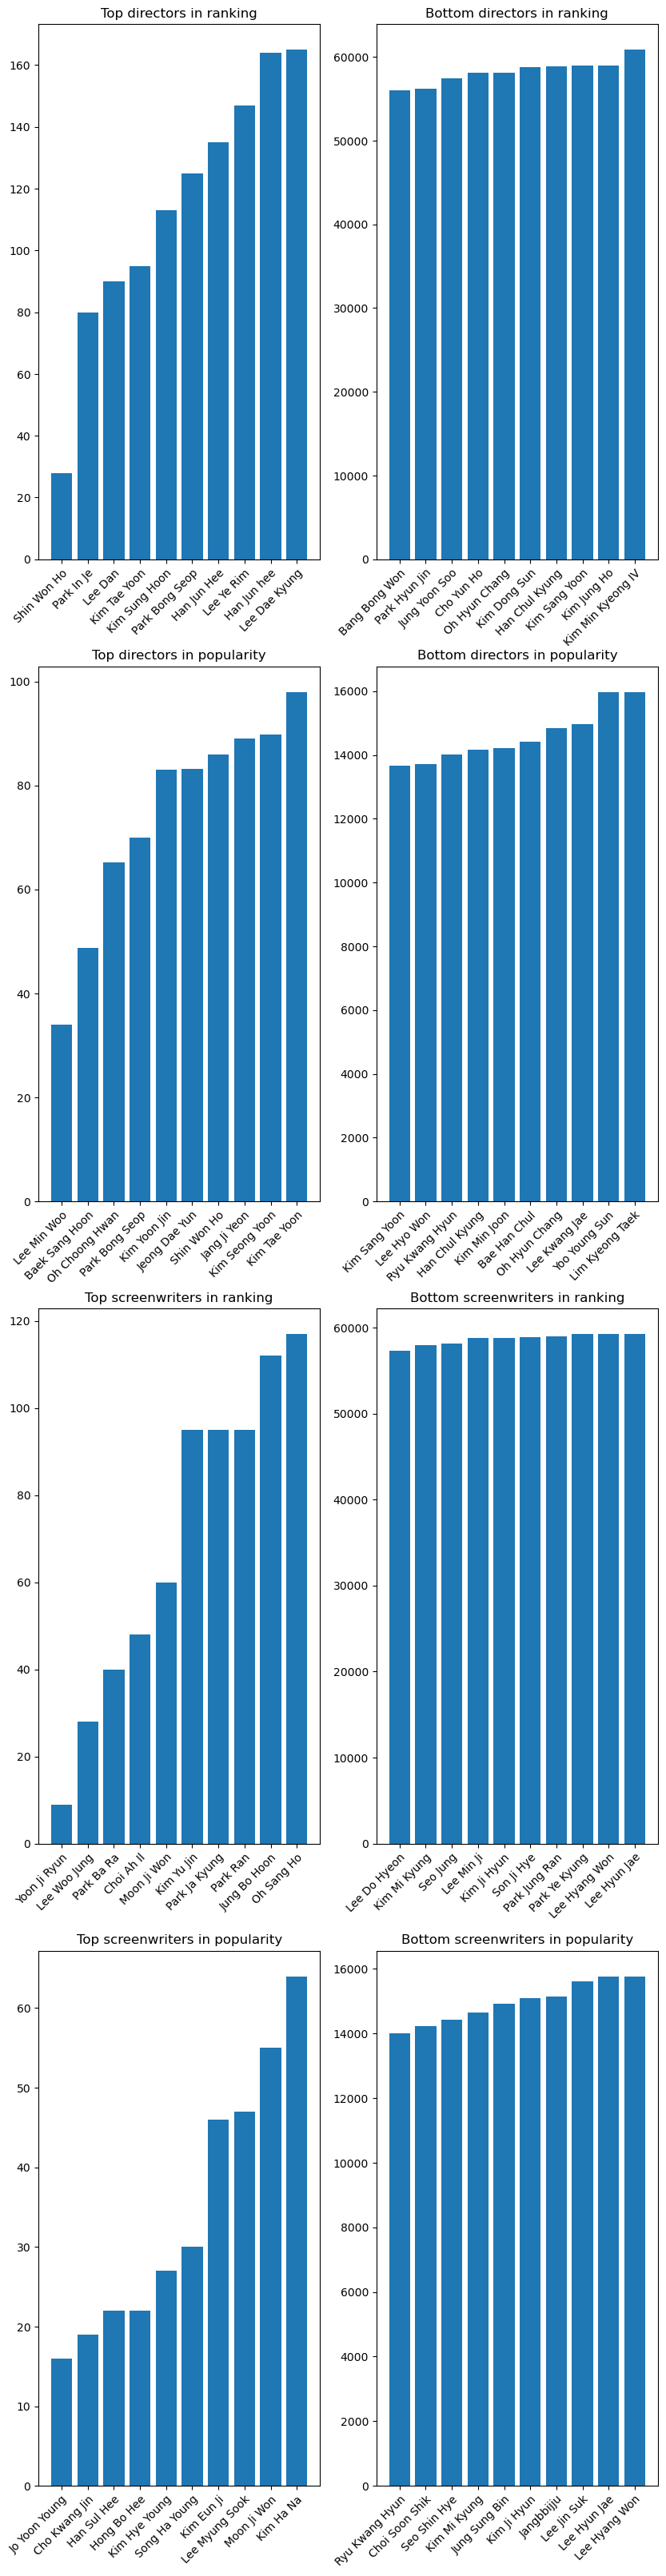

In [51]:
fig, axs = plt.subplots(4, 2, figsize=(10, 40))
axs[0, 0].bar(rank1.head(10).index, rank1.head(10)['rank'])
axs[0, 0].set_title("Top directors in ranking")
axs[0, 0].set_xticks(range(10), rank1.head(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[0, 1].bar(rank1.tail(10).index, rank1.tail(10)['rank'])
axs[0, 1].set_title("Bottom directors in ranking")
axs[0, 1].set_xticks(range(10), rank1.tail(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[1, 0].bar(rank2.head(10).index, rank2.head(10)['pop'])
axs[1, 0].set_title("Top directors in popularity")
axs[1, 0].set_xticks(range(10), rank2.head(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[1, 1].bar(rank2.tail(10).index, rank2.tail(10)['pop'])
axs[1, 1].set_title("Bottom directors in popularity")
axs[1, 1].set_xticks(range(10), rank2.tail(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[2, 0].bar(rank3.head(10).index, rank3.head(10)['rank'])
axs[2, 0].set_title("Top screenwriters in ranking")
axs[2, 0].set_xticks(range(10), rank3.head(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[2, 1].bar(rank3.tail(10).index, rank3.tail(10)['rank'])
axs[2, 1].set_title("Bottom screenwriters in ranking")
axs[2, 1].set_xticks(range(10), rank3.tail(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[3, 0].bar(rank4.head(10).index, rank4.head(10)['pop'])
axs[3, 0].set_title("Top screenwriters in popularity")
axs[3, 0].set_xticks(range(10), rank4.head(10).index, rotation=45, ha="right", rotation_mode="anchor")

axs[3, 1].bar(rank4.tail(10).index, rank4.tail(10)['pop'])
axs[3, 1].set_title("Bottom screenwriters in popularity")
axs[3, 1].set_xticks(range(10), rank4.tail(10).index, rotation=45, ha="right", rotation_mode="anchor")

### visualization 1: scatter plot of rank v.s. pop

Text(0, 0.5, 'popularity')

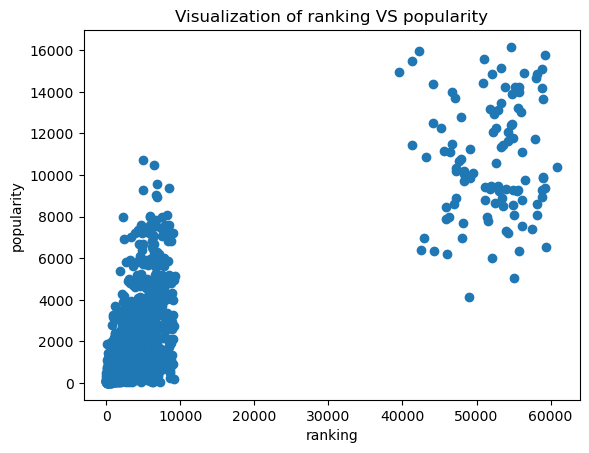

In [12]:
plt.scatter(info['rank'], info['pop'])
plt.title('Visualization of ranking VS popularity')
plt.xlabel('ranking')
plt.ylabel('popularity')